In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 , 15, 16, 17, 18, 19, 20, 21, 22]
data = pd.read_csv(r"C:\Users\silaz\github\capstone\IS362\w13\agaricus-lepiota.csv", names=names)
#print(data)
new_df = data[[0, 5, 3]]
new_df.columns = ['classes', 'odor', 'cap color']
new_df['classes'] = new_df['classes'].map({'p' : 1, 'e' : 0})
new_df['odor'] = new_df['odor'].map({'a' : 2, 'l' : 3, 'c' : 4, 'y' : 5, 'f' : 6, 'm' : 7, 'n' : 8, 'p' : 9, 's' : 10})
new_df['cap color'] = new_df['cap color'].map({'n' : 1, 'b' : 2, 'c' : 3, 'g' : 4, 'r' : 5, 'p' : 6, 'u' : 7, 'e' : 8, 'w' : 9, 'y' : 10})

C:\Users\silaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\silaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\silaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

In [2]:
X = new_df[['odor', 'cap color']].to_numpy()
y = new_df['classes'].to_numpy()
from sklearn import svm
clf = svm.SVC(kernel='linear', C = 1.0)
clf.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

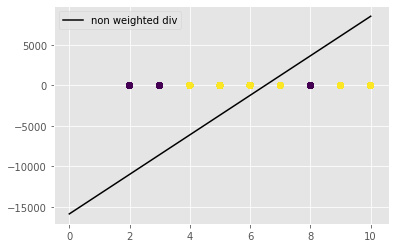

In [3]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 10)
yy = a * xx - clf.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label='non weighted div')
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1)
#data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [5]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [6]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [7]:
pred = knn.predict(X_test)

In [8]:
print ("KNeighbors accuracy score : ",accuracy_score(y_test, pred))

KNeighbors accuracy score :  0.9807976366322009


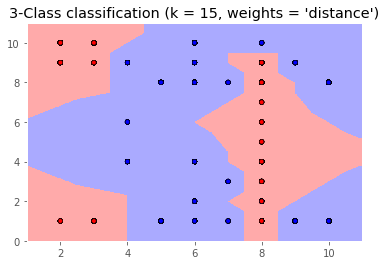

In [9]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
n_neighbors = 15
h = .02
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

## Conclusion

From these two charts, it can be seen that 2, 3, and 8 are the most indicative of poison. Since we have more 8 in the odor category, it appears that odor is more indicative of a poisonous mushroom species than cap color is.